# Introducción a Métodos Bayesianos

Índice:
* Bases de probabilidad
* Marginalización, probabilidades condicionadas (reducción) y factorización de probabilidad: redes bayesianas
* Independencia y caminos activos
* Algoritmo de eliminación de variables

## Bases de probabilidad

Dominio de una variable determina el conjunto de valores que puede tomar. Los dominios puedes ser discretos o continuos. Algunos ejemplos:
* dom(tirar un dado) = {1,2,3,4,5,6}
* dom(moneda) = {cara, cruz}
* dom(nota) = [1, 10]

Notación: Para las variables aleatorias vamos a usar letras mayúsculas y para posibles asignaciones letras minúsculas. Por ejemplo, si X representa tirar una moneda podríamos poner dom(X)={cara,cruz} y decir que P(X=cara)=0'5

#### Reglas de probabilidad:

* Regla de la suma: $P(A) + P(\bar{A}) = 1$ y en general

$$ \sum_{x \in dom(X)} P(X=x) = 1 $$

* Regla del producto: $P(A,B) = P(A|B)P(B) = P(B|A)P(A)$
* Regla de la cadena (extensión de la regla del producto):     

$$P(A,B,C,D) = P(A|B,C,D)P(B,C,D) = \\ = P(A|B,C,D)P(B|C,D)P(C,D) = \\ = P(A|B,C,D)P(B|C,D)P(C|D)P(D) $$

* Regla de Bayes:
Es despejar en la regla del producto $P(A|B)P(B) = P(B|A)P(A)$ para obtener

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

En general se utiliza para tomar decisiones. Cambiando A por hipóstesis (H) y B por datos (D) tenemos

$$ P(H|D) = \frac{P(D|H)P(H)}{P(D)} $$

y cada término es

* P(H): Probabilidad a priori de la hipótesis
* P(D|H): Verosimilitud de los datos suponiendo H es cierta
* P(D): Evidencia
* P(H|D): Probabilidad a posteriori

### Marginalización de una variable

Si tenemos una distribución de probabilidad de dos variables P(A,B) y queremos saber P(A), debemos marginalizar B, esto es

$$P(A|I)=\sum_{k=1}^K P(A,B = b_k|I)$$

asumiendo que el dominio de B es $dom(B)=\{b_1,\dots,b_K\}$. Donde se está aplicando la regla de la suma.

Ej. ¿Cuál es la probabilidad de sacar sobresaliente, P(N=sob)? Podríamos decir que depende de la dificultad del examen (El examen puede se fácil, normal o difícil)

$ P(N=sob) = P(N=sob, Ex=facil) +  P(N=sob, Ex=normal)  + P(N=sob, Ex=dificil)$

### Independencia de variables

Si A y B son independientes entonces:

$$ P(A,B) = P(A|B)P(B) = P(A)P(B) $$

Independencia significa que conocer una de las variables no nos aporta información adicional sobre el estado de la otra.

### Distribución conjunta

Una distribución de probabilidad en varias variables

#### Ejemplo

Consideramos la distribución conjunta que relaciona para un estudiante con las variables nota examen (G), dificultad examen (D) e Inteligencia (I)

* Nota examen (G): g0 (sobresaliente), g1 (notable), g2 (aprobado)
* Dificultad examen (D): d0 (fácil) y d1 (difícil)
* Inteligencia (I): i0 (normal), i1 (alta)

| I | D | G | P(I,D,G)  |
|---|---|---|---|
| i0  | d0  | g0  | 0.126  |
| i0  | d0  | g1  | 0.168  |
| i0  | d0  | g2  | 0.126  |
| i0  | d1  | g0  | 0.014  |
| i0  | d1  | g1  | 0.070  |
| i0  | d1  | g2  | 0.196  |
| i1  | d0  | g0  | 0.162  |
| i1  | d0  | g1  | 0.0144  |
| i1  | d0  | g2  | 0.0036  |
| i1  | d1  | g0  | 0.06  |
| i1  | d1  | g1  | 0.036  |
| i1  | d1  | g2  | 0.024  |


Algunas consideraciones:

* La suma de todas las probs de esta tabla debe ser 1, ya que es una distribución de probabilidad
* La tabla asigna una probabilidad a cada combinación posible, esto es a 2 x 2 x 3 combinaciones
* Hay $12 - 1$ parámetros independientes



In [ ]:
# Definimos la distrb de arriba como una matriz de 2 x 2 x 3

import numpy as np

probs = np.array([0.126, 0.168, 0.126, 0.014, 0.07, 0.196, 0.162, 0.0144, 0.0036, 0.06, 0.036, 0.024])
probs = probs.reshape((2,2,3))
probs
# Definimos el orden de las variables en las dimensiones de una
# matriz de 3D como
#
# Dimensión -> 0  1  2
# Variable  -> I, D, G
I = 0
D = 1
G = 2

##### Ejercicio
Algunas consultas:

1. ¿Cuál es la probabilidad de que un estudiante al azar tenga inteligencia normal, saque sobresaliente y el examen sea fácil?
2. ¿Cuál es la probabilidad de sacar sobresaliente sin tener en cuenta nada más? ¿Y notable? ¿Y aprobado?
3. Dado que el examen era fácil y que el estudiante tiene una inteligencia alta, ¿Cuál es la distribucion de probabilidad de las notas?

In [ ]:
# respuesta 1
print('P(G=g0,D=d0,I=i0) =', probs[0,0,0])

# respuesta 2 -> Marginalizar variables
print('P(G=g0) =', np.sum(probs[:,:,0]))
print('P(G=g1) =', np.sum(probs[:,:,1]))
print('P(G=g2) =', np.sum(probs[:,:,2]))

# respuesta 3  -> Reducir y renormalizar
p = probs[1,0,:]
print('P(G|D=d0,I=i1) = P(G,D=d0,I=i1)/P(D=d0,I=i1)', p/np.sum(p))

P(G=g0,D=d0,I=i0) = 0.126
P(G=g0) = 0.36200000000000004
P(G=g1) = 0.2884
P(G=g2) = 0.3496
P(G|D=d0,I=i1) = P(G,D=d0,I=i1)/P(D=d0,I=i1) [0.9  0.08 0.02]


### Marginalizar

| I | D | G | P(I,D,G)  |
|---|---|---|---|
| i0  | d0  | g0  | 0.126  |
| i0  | d0  | g1  | 0.168  |
| i0  | d0  | g2  | 0.126  |
| i0  | d1  | g0  | 0.014  |
| i0  | d1  | g1  | 0.070  |
| i0  | d1  | g2  | 0.196  |
| i1  | d0  | g0  | 0.162  |
| i1  | d0  | g1  | 0.0144  |
| i1  | d0  | g2  | 0.0036  |
| i1  | d1  | g0  | 0.06  |
| i1  | d1  | g1  | 0.036  |
| i1  | d1  | g2  | 0.024  |

$$ P(D,G) = \sum_{i=i0}^{i1} P(I=i,D,G)  $$

| D | G | P(D,G)  |
|---|---|---|
| d0  | g0  | 0.126 + 0.162  = 0.288 |
| d0  | g1  | 0.168 + 0.0144 = 0.1824 |
| d0  | g2  | 0.126 + 0.0036 = 0.1296 |
| d1  | g0  | 0.014 + 0.06   = 0.074 |
| d1  | g1  | 0.070 + 0.036  = 0.106 |
| d1  | g2  | 0.196 + 0.024  = 0.22 |

$$ P(G) = \sum_{d=d0}^{d1} P(D=d,G)  $$

| G | P(D,G)  |
|---|---|
| g0  |  0.288 + 0.074 = 0.362     |
| g1  | 0.1824 + 0.106 = 0.2884   |
| g2  | 0.1296 + 0.22  = 0.3496 |

### Condicionar (reducir y normalizar)
Si sabemos ya algunos valores (p.e. examen era fácil y el estudiante tiene una inteligencia alta), podemos eliminar todas las combinaciones no compatibles con las observaciones. Para D=d0 y I=i1 la tabla se reduce a:

| I | D | G | P(I,D,G)  |
|---|---|---|---|
| i0  | d0  | g0  | ~~0.126~~  |
| i0  | d0  | g1  | ~~0.168~~  |
| i0  | d0  | g2  | ~~0.126~~  |
| i0  | d1  | g0  | ~~0.014~~  |
| i0  | d1  | g1  | ~~0.070~~  |
| i0  | d1  | g2  | ~~0.196~~  |
| i1  | d0  | g0  | 0.162  |
| i1  | d0  | g1  | 0.0144  |
| i1  | d0  | g2  | 0.0036  |
| i1  | d1  | g0  | ~~0.06~~ |
| i1  | d1  | g1  | ~~0.036~~  |
| i1  | d1  | g2  | ~~0.024~~  |

Los valores resultantes no son una distriibución de probabilidad ya que no suman 1. Para hacer que lo sea se pueden renormalizar y tendríamos

$$ P(G|I=i1,D=d0) = \frac{P(G,I=i1,D=d0)}{P(I=i1,D=d0)} $$

| G | P(G\|I=i1,D=d0) |
|---|---|
| g0  | 0.9   |
| g1  | 0.08   |
| g2  | 0.02   |



In [ ]:
def marginal(distribution, variables):
    """ Marginalizes the distributions for the given list of variables """

    return np.sum(distribution, axis=tuple(variables), keepdims=True)

P_G = marginal(probs, [I,D])
P_G

array([[[0.362 , 0.2884, 0.3496]]])

In [ ]:
def normalize(distribution):
    return distribution/np.sum(distribution)

def reduce(distribution, variables, asignments, normalize_output=True):
    """ This function receives a distribution,
        a list of indices to variables and
        a list of the assignements to those variables """

    reduced = distribution.copy()

    for variable, asignment in zip(variables,asignments):
        reduced = np.swapaxes(reduced, 0, variable)[[asignment]]
        reduced = np.swapaxes(reduced, 0, variable)

    return normalize(reduced) if normalize_output else reduced

dr = reduce(probs, [I,D], [1,0])
dr

array([[[0.9 , 0.08, 0.02]]])

##### Ejercicio
Comprueba si las variables I y D son independientes, esto es si $P(I,D) = P(I)P(D)$

Pista 1: Primero debes marginalizar G para obtener $P(I,D)$

Pista 2: A continuación puedes comprobar si $P(I|D)$ es igual a $P(I)$ y $P(D|I)$ es igual a $P(D)$.


In [ ]:
# P(I,D)
P_ID = marginal(probs, [G])
print('P(I,D) =', P_ID)

# P(I)P(D)
P_I =  marginal(probs, [D,G])
P_D =  marginal(probs, [I,G])
print('P(I)P(D) =', P_I*P_D)

# Independencia si P_ID == P_I*P_D
print('Son independientes?', np.allclose(P_ID, P_I*P_D))

P(I,D) = [[[0.42]
  [0.28]]

 [[0.18]
  [0.12]]]
P(I)P(D) = [[[0.42]
  [0.28]]

 [[0.18]
  [0.12]]]
Son independientes? True


### Factorización

Cuando dos probabilidades son independientes se dice que su distribución conjunta factoriza, es decir, que se puede descomponer en el producto de dos factores o distribuciones independientes. Para la distribución anterior podemos escribir aplicando la regla de la cadena y el hecho de que I y D son independientes:

$$ P(I,D,G) = P(G|I,D)P(I,D) = P(G|I,D)P(I)P(D) $$

es decir la distribución conjunta se puede escribir como el producto de tres factores.



### Redes de Bayes

Este tipo de relaciones en una distribución se pueden representar con un grafo denominado red bayesiana.
Una red bayesiana reresenta una distribución conjunta a través de la regla de la cadena en forma de grafo acíclico dirigido, donde:

* Los vértices del grafo son las distribuciones condicionadas de probabilidad (CPD) asociadas a cada una de las variables de la distribución $\{X_1, X_2, \dots, X_N\}$
* Las aristas son las dependencias de probabilidad entre las variables dadas por la regla de la cadena.

Esta representación utiliza que cualquier distribución conjunta de variables se puede escribir mediante la regla de la cadena como un producto de distribuciones condicionadas

$$ P(X_1, X_2, \dots, X_N) = \prod_{i=1}^N P(X_i|Par(X_i))$$

donde $Par(X_i)$ son el conjunto de variables que condicionan a $X_i$ (o variables progenitores).

Por ejemplo, para la siguiente distribución y descomposición con la regla de la cadena:

$$ P(A,B,C,D) = P(A|B,C,D)P(B|C,D)P(C|D)(D) $$

la red de bayes asociada sería

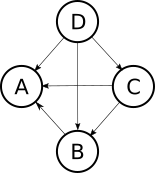

Este caso, la distribución no incluye ninguna independencia entre variables y de hecho podría tener muchas representaciones equivalentes si aplicamos la regla de la cadena de otra forma.

Si existen independencias entre las varibables de la distribución entonces la distribución conjunta y los grafos asociados se simplifican.
Por ejemplo, para el caso del estudiante de arriba la red byesiana sería

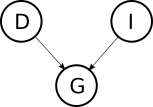

ya que su distribución conjunta es $ P(I,D,G) = P(G|I,D)P(I)P(D) $. A cada nodo del grafo se le asocia el factor o distribución condicionada de probabilidad (CPD). Es decir, $P(G|I,D)$ se asocia al nodo G, $P(D)$ al nodo D y $P(I)$ al nodo I.



In [ ]:
# Calculamos de todas la distribución condicionada de P(G|D,I) asociada al nodo G
d = np.zeros_like(probs)
for i in [0,1]:
    for j in [0,1]:
        d[i,j,:] = reduce(probs, [I,D], [i,j])

P_G_ID = d

# Calcula P(D)
P_D = marginal(probs, [G,I])

# Calcula P(I)
P_I = marginal(probs, [G,D])

print(P_G_ID)
print(P_D)
print(P_I)

[[[0.3  0.4  0.3 ]
  [0.05 0.25 0.7 ]]

 [[0.9  0.08 0.02]
  [0.5  0.3  0.2 ]]]
[[[0.6]
  [0.4]]]
[[[0.7]]

 [[0.3]]]


##### Producto de factores

En general, dos factores $\phi_1(A,B)$ y $\phi_2(B,C)$ se multiplican para obtener otro factor $\phi(A,B,C)$ multiplicando las entradas compatibles de las tablas. Es decir:

$$ \phi(A=ai,B=bj,C=ck) = \phi_1(A=ai,B=bj) \phi_2(B=bj, C=ck) $$

In [ ]:
# Tal como hemos definido las tablas de probabilidad con una variable por dimensión,
# el producto de factores es simplemente hacer el producto
P_DIG = P_G_ID * P_I * P_D
P_DIG

# Comprueba que es igual a la distribución original

# Cómo calculas el valor de probabilidad de la consulta 1 de
# arriba, P(I=i0, G=g0, D=d0), a partir de los factores...pues
# igual P(I=i0, G=g0, D=d0) = P(G=g0|I=i0,D=d0)P(I=i0)P(D=d0)
# Ojo con los índices
i=0
P_G_ID[1,1,0] * P_I[1,0,0] * P_D[0,1,0]

0.06

#### Red del estudiante ampliada

Este ejemplo ha sido adaptado Probabilistic Graphical Model (Daphne Koller). Relaciona las sguientes variables

* Nota examen (G): g0 (sobresaliente), g1 (notable), g2 (aprobado)
* Dificultad examen (D): d0 (fácil) y d1 (difícil)
* Inteligencia (I): i0 (normal), i1 (alta)
* Nota Selectividad (S): s0 (baja), s1 (alta)
* Carta de recomendación (L): l0 (regular), l1 (buena)

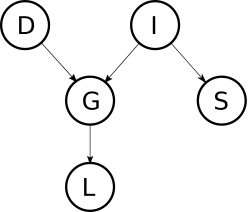

ya que su distribución conjunta es $ P(D,I,G,L,S) = P(G|I,D)P(I)P(D)P(S|I)P(L|G) $

Las CPDs (distribuciones codicionadas de probabilidad) vienen dadas por:

$ P(I):$

| i0| i1|
|---|---|
| 0.7| 0.3|

$ P(D):$

| d0| d1|   
|---|---|   
| 0.6| 0.4|

$ P(G|I,D):$

| | g0 | g1 | g2 |
|---|---|---|---|
| i0,d0 | 0.3| 0.4 | 0.3 |
| i0,d1 | 0.05| 0.25 | 0.7 |
| i1,d0 | 0.9| 0.08 | 0.02 |
| i1,d1 | 0.5| 0.3 | 0.2 |

$ P(L|G):$

| | l0 | l1 |
|---|---|---|
| g0 | 0.1| 0.9 |
| g1 | 0.4| 0.6 |
| g2 | 0.99| 0.01 |

$ P(S|I):$

| | s0 | s1 |
|---|---|---|
| i0 | 0.95| 0.05 |
| i1 | 0.2| 0.8 |

Vamos a comprobar si esta factorización es una distribución de probabilidad válida. Para ello debemos comprobar si suma 1. Es decir debemos comprobar si:

$$ \sum_{D,I,G,L,S}P(D,I,G,L,S) = \sum_{D,I,G,L,S} P(G|I,D)P(I)P(D)P(S|I)P(L|G) = 1 $$

No todas las sumatorias afectan a todos los factores por lo que podemos mover algunas dentro. Empezamos con S, ya que solo hay un factor que depende de esa variable

$$ \sum_{D,I,G,L} P(G|I,D)P(I)P(D)P(L|G)\sum_S P(S|I)  = \sum_{D,I,G,L} P(G|I,D)P(I)P(D)P(L|G) $$

donde hemos aplicado que $\sum_S P(S|I)=1$ ya que es una distribución válida sobre S independientemente del valor de I. Podemos continuar

$$ \sum_{D,I,G,L} P(G|I,D)P(I)P(D)P(L|G) =  \sum_{I} P(I)\sum_{D}P(D)\sum_G P(G|I,D) \sum_L P(L|G) = 1 $$


In [ ]:
# Definamos los factores del problema con el siguiente orden de
# variables

# Dimensión -> 0  1  2  3  4
# Variable  -> I, D, G, L, S
I = 0
D = 1
G = 2
L = 3
S = 4

PI = np.array([0.7, 0.3]).reshape((2,1,1,1,1))
PD = np.array([0.6, 0.4]).reshape((1,2,1,1,1))
PG_ID = np.array([0.3, 0.4, 0.3, 0.05, 0.25, 0.7, 0.9, 0.08, 0.02, 0.5, 0.3, 0.2]).reshape((2,2,3,1,1))
PL_G = np.array([0.1, 0.9, 0.4, 0.6, 0.99, 0.01]).reshape((1,1,3,2,1))
PS_I = np.array([0.95, 0.05, 0.2, 0.8]).reshape((2,1,1,1,2))

# Distribución conjunta
PIDGLS = PI*PD* PG_ID * PL_G* PS_I

# Comprueba que es una distribución válida que suma a 1
# Usando la distrib conjunta
np.sum(PIDGLS)

# Hazlo pero siguiendo los pasos de arriba, sumando en orden: S, L, etc
marginal(PI*marginal(PD*marginal(PG_ID*marginal(PL_G*marginal(PS_I,[S]),[L]), [G]),[D]),[I])

array([[[[[1.]]]]])

### Razonamiento causal
Razonamiento que va desde las causas a las consecuencias. Cuando observamos que una variable progenitor tiene un valor, esto afecta a la probabilidad de las variables descendientes

##### Ejemplo

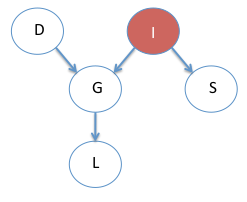
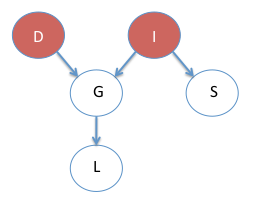

In [ ]:
# Consultas
# Hazlo de dos formas:
#  1) usando la distribución conjunta
#  2) Moviendo las sumatorias adecuadamente en los factores

# Prob de conseguir una carta de recomendación buena P(L=l1)
#   -> hay que marginalizar todas las variables menos L
print(marginal(PIDGLS, [I,D,G,S]))
print(marginal(PI*marginal(PD*marginal(PG_ID*PL_G*marginal(PS_I,[S]),[G]),[D]),[I]))
print('-------')

# Prob de conseguir una carta de recomendación buena dado que
#  el estudiante es normal P(L=l1|I=i0)
#   -> hay que reducir el factor a los valores compatibles con I=i0
#      y normalizarlo
#   -> y luego marginalizar todas las variables menos L
print(marginal(reduce(PIDGLS,[I],[0]), [D,G,S]))
print(normalize(reduce(P_I,[I],[0])*marginal(PD*marginal(reduce(PG_ID, [I],[0])*PL_G,[G]), [D])))
# La prob de l1 baja
print('-------')

# Prob de conseguir una carta de recomendación buena dado que
#          el estudiante es normal pero el examen fue fácil P(L=l1|I=i0,D=i0)
#   -> hay que reducir el factor a los valores compatibles con I=i0,D=d0 y normalizarlo
#   -> y luego marginalizar todas las variables menos L
print(marginal(reduce(PIDGLS,[I,D],[0,0]), [G,S]))
# La prob de l1 vuelve a subir
print(normalize(reduce(P_I,[I],[0])*reduce(PD,[D],[0])*marginal(reduce(PG_ID, [I,D],[0,0])*PL_G,[G])))



[[[[[0.497664]
    [0.502336]]]]]
[[[[[0.497664]
    [0.502336]]]]]
-------
[[[[[0.6114]
    [0.3886]]]]]
[[[[[0.6114]
    [0.3886]]]]]
-------
[[[[[0.487]
    [0.513]]]]]
[[[[[0.487]
    [0.513]]]]]


### Razonamiento evidencial
Es el inverso del causal. Cuando se observa que una variable descendiente tiene un valor, esto afecta a la probabilidad de las variables progenitores

##### Ejemplo
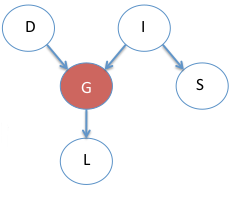

In [ ]:
## ¿Cual es la probabilidad de que el examen sea difícil?
print(marginal(PI*marginal(PG_ID,[G]),[I])*PD)
print(PD)
# Dado que la nota ha sido aprobado, ¿Cuál es la prob de examen difícil?

print(normalize(PD*marginal(PI*reduce(PG_ID,[G],[2]),[I])))

[[[[[0.6]]]


  [[[0.4]]]]]
[[[[[0.6]]]


  [[[0.4]]]]]
[[[[[0.37070938]]]


  [[[0.62929062]]]]]


### Independencia condicionada
La independencia se puede perder tras condicionar una variable. Por ejemplo, P(I,D)=P(I)P(D) pero si condicionamos a G, esta independencia se pierde.


In [ ]:
# Comprueba que esto es así
# Pista 1: Prueba que para una asignación de G que no se cumple.
# Por ejemplo para G=g0 ver si P(D|G=g0)*P(I|G=g0)=P(D,I|G=g0)
PD_g0 = normalize(PD*marginal(PI*reduce(PG_ID,[G],[0]),[I]))
PI_g0 = normalize(PI*marginal(PD*reduce(PG_ID,[G],[0]),[D]))
PID_g0 = normalize(PD*PI*reduce(PG_ID,[G],[0]))
print(PD_g0*PI_g0, PID_g0)


#Pista 2: También puedes comprobar si P(I,D|G) es P(I|G)*P(D|G)
PIDG = (PD*PI*PG_ID)/marginal(PD*PI*PG_ID,[I,D])
print(PIDG)
print('------------')
print(marginal(PIDG,[I])*marginal(PIDG,[D]))


[[[[[0.30768292]]]


  [[[0.07905742]]]]



 [[[[0.48789719]]]


  [[[0.12536247]]]]] [[[[[0.3480663 ]]]


  [[[0.03867403]]]]



 [[[[0.44751381]]]


  [[[0.16574586]]]]]
[[[[[0.3480663 ]]

   [[0.58252427]]

   [[0.3604119 ]]]


  [[[0.03867403]]

   [[0.24271845]]

   [[0.56064073]]]]



 [[[[0.44751381]]

   [[0.04993065]]

   [[0.01029748]]]


  [[[0.16574586]]

   [[0.12482663]]

   [[0.06864989]]]]]
------------
[[[[[0.30768292]]

   [[0.52192882]]

   [[0.34144285]]]


  [[[0.07905742]]

   [[0.3033139 ]]

   [[0.57960978]]]]



 [[[[0.48789719]]

   [[0.1105261 ]]

   [[0.02926653]]]


  [[[0.12536247]]

   [[0.06423118]]

   [[0.04968084]]]]]


### Razonamiento intercausal
Es un tipo de razonamiento menos habitual que tiene que ver con el flujo de información entre dos causas con el mismo efecto

##### Ejemplo
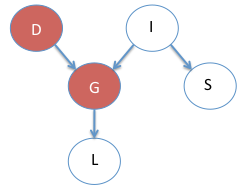


In [ ]:
# Calcula la probabilidad de que un estudiante tenga
# inteligencia alta P(I=i1)
print(PI)

# Si sabemos que la nota del examen es aprobado, ¿Cuál es la prob de inteligencia alta?
# P(I=i1|G=g2)

print(normalize(PI*marginal(PD*reduce(PG_ID,[G],[2]),[D])))

# y si además el examen es difícil
# P(I=i1|G=g2,D=d1)
print(normalize(PI*reduce(PD*reduce(PG_ID,[G],[2]),[D],[1])))

[[[[[0.7]]]]



 [[[[0.3]]]]]
[[[[[0.92105263]]]]



 [[[[0.07894737]]]]]
[[[[[0.89090909]]]]



 [[[[0.10909091]]]]]


### Razonamiento a través de un camino

¿Cómo influye en la dificultad del examen si sabemos que la nota es aprobado (G=g0)? ¿y si además sabemos que la nota de selectividad es alta (S=s1)?

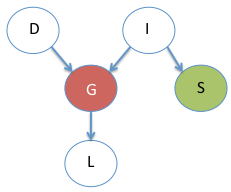

In [ ]:
# Probabilidad de examen difícil D=d1?
print(PD)

# Probabilidad de examen difícil D=d1|G=aprobado?
print(normalize(PD*marginal(PI*reduce(PG_ID,[G],[2]),[I])))

# Probabilidad de examen difícil D=d1|G=g2,S=s1?
print(normalize(PD*marginal(PI*reduce(PG_ID,[G],[2])*reduce(PS_I,[S],[1]),[I])))


[[[[[0.6]]]


  [[[0.4]]]]]
[[[[[0.37070938]]]


  [[[0.62929062]]]]]
[[[[[0.24044002]]]


  [[[0.75955998]]]]]


##### Ejercicio
Si no se conoce G, ¿Influye la nota de selectividad en la dificultad del examen?

### Flujo de información y caminos activos
* En una red de bayes dos variables son independientes dado un conjunto de variables, si no hay ningún camino activo entre ellas.
* Un camino activo indica que existe flujo de información.
* Los casos de razomaniento de arriba son caminos activos

En general: ¿Cuándo X influye sobre Y a través de W?

* X --> W --> Y: Causal     ->  SI
* X <-- W <-- Y: Evidencial ->  SI
* X <-- W --> Y: Evidencial + Causal -> SI
* X --> W <-- Y: **Se denomina estructura en V** ->  NO

##### Ejemplo independencia

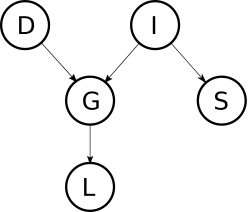

* Conocer D afecta a L -> SÍ
* Conocer L afecta a D -> SÍ
* Conocer G afecta a S -> SÍ
* Conocer D afecta a I -> NO

--

Ahora, suponiendo que hemos observado un conjunto de variables $\mathbf{Z}$: ¿Cuándo X influye sobre Y a través de W dado $\mathbf{Z}$?

|   | $$ W\in Z $$ | $$ W \notin Z $$  |
|---|---|---|
| X --> W --> Y| NO |       SI |
| X <-- W <-- Y| NO |       SI |
| X <-- W --> Y| NO |       SI |
| X --> W <-- Y| SI* |       NO** |

\* Siempre que W o alguno de sus descendientes esté en Z

\*\* Siempre que ni W, ni ninguno de sus descendientes esté en Z

##### Ejemplo independencia dada una evidencia
Para la red de arriba tenemos que

* Conocer D afecta a L dado G -> NO
* Conocer L afecta a D dado G -> NO
* Conocer G afecta a S dado I -> NO
* Conocer D afecta a I dado G -> SÍ
* Conocer D afecta a I dado L -> SÍ

Veamos un ejemplo más complejo

### Camino activo
Dado un camino en el grafo  $X_1 - X_{2} - \dots - X_{n}$, se dice que está activo si

* Para todas las estructras en V del camino, $X_{i-1} \rightarrow X_i \leftarrow X_{i+1}$, tenemos que o bien $X_i$, o bien al menos uno de sus descendientes, es observado
* El resto de nodos del camino no han sido observados

##### Ejemplo caminos activos

estudiante3.svg


<p>
Indica cuáles de los siguientes caminos están activos:
<ul style="font-family:monospace;">
    <li>C ‐&gt; D ‐&gt; G &lt;- I ‐&gt; S <b>NO, camino en V</b></li>
    <li>I ‐&gt; G ‐&gt; L ‐&gt; J ‐&gt; H <b>SI, causal</b></li>
    <li>I -&gt; S ‐&gt; J ‐&gt; H <b>SI, causal</b></li>
    <li>C ‐&gt; D -&gt; G &lt;- I ‐&gt; S ‐&gt; J &lt;‐ L <b>NO, camino en V</b></li>
    <li>C -&gt; D -&gt; G &lt;- I -&gt; S -&gt; J &lt;- L | H <b>SI, se activa porque conocemos H que hereda tanto de G como de J</b></li>
    <li>C -&gt; D -&gt; G -&gt; H &lt;- J | H <b>SI, conocemos H</b></li>
    <li>C -&gt; D -&gt; G &lt;- I -&gt; S -&gt; J &lt;- L | G <b>NO, aunque conocemos G, hay estructura en V en J</b></li>
    <li>I ‐&gt; G ‐&gt; L ‐&gt; J ‐&gt; H | G <b>NO, se bloquea en G</b></li>
    <li>D -&gt; G &lt;- I -&gt; S | L <b>SI, se activa porque conocemos L</b></li>
    <li>D -&gt; G -&gt; L -&gt; J | L <b>NO, se bloquea en L, pero sí que influye por el camino D -&gt; G &lt;- I -&gt; S -&gt; J</b></li>
    <li>G -&gt; H &lt;- J &lt;- S | L <b>NO, H no tiene herederos</b></li>
    </ul>
</p>


<p style="clear:left"></p>



### Independencia en una red
Para la factorización dada por una red de bayes, dos variables X,Y son independientes dada una evidencia Z, esto es $X \perp Y | Z $, si no existe ningún camino activo entre ellas

##### Ejercicio
Analiza bajo qué condiciones S influye a D en el grafo de arriba

#### De las independencias del grafo se recupera la factorización

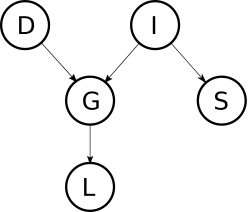

Aplicamos la regla de la cadena (no supone ninguna independencia entre variables)

$$ P(D,I,G,L,S) = P(D)P(I|D)P(G|D,I)P(L|D,I,G)P(S|D,I,G,L) $$

Ahora veamos las independencias de los factores en la grafo:
* P(D): No se puede simplificar más
* P(I|D): Del grafo vemos que no hay camino activo entre I y D por tanto $ I\perp  D $ y entonces P(I|D)=P(I)
* P(G|D,I): Este factor queda igual ya que sí que hay dependencias entre G y D y entre G e I
* P(L|D,I,G): Existe una dependencia entre G y L que tienen enlace directo, por lo tanto G permanece. Vemos que dado G el resto de variables son independientes  $ L \perp I | G$ y $ L \perp D | G$. Por tanto el factor queda como $P(L|D,I,G)=P(L|G)$
* P(S|D,I,G,L): Existe dependencia directa entre I y S, por tanto I permanece. Y dado I la dependencia con el resto de variables se bloquea, es decir $ S \perp G | I$, $ S \perp D | I$ y $ S \perp L | I$. Por tanto el factor queda como $P(S|L,D,I,G)=P(S|I)$

Y la factorización queda:

$$ P(D,I,G,L,S) = P(D)P(I)P(G|D,I)P(L|G)P(S|I) $$


## Algoritmo de Eliminación de Variables (Práctica 3.1)

Este algoritmo es para hacer inferencia en redes. Supongamos que tenemos la factorización de una distribución conjunta

$$ P(\mathbf{X}) = P(X_1, X_2, \dots, X_N) = \prod_{i=1}^N P(X_i|Par(X_i))$$

y una evidenica $ \mathbf{Z}=\mathbf{z} $, donde $\mathbf{Z} \subset \mathbf{X}$ es un subconjunto de las variables del problema y $\mathbf{z}$ son sus valores observados. El objetivo es obtener la distribución de parte de las variables del problema, $\mathbf{W} \subset \mathbf{X}$ dada la evidencia $\mathbf{Z}=\mathbf{z}$. Es decir queremos obtener $P(\mathbf{W}|\mathbf{Z}=\mathbf{z})$. Para ello debemos:
* Reducir los factores que incluyan $\mathbf{Z}$
* Eliminar el resto de variables no incluidas $\mathbf{W}$

$$ P(\mathbf{W}|\mathbf{Z}=\mathbf{z}) = \sum_{X \setminus (W\cup Z)} \frac{P(\mathbf{X}\setminus \mathbf{Z},\mathbf{Z}=\mathbf{z})}{P(\mathbf{Z}=\mathbf{z})} \propto \sum_{X \setminus (W\cup Z)} P(\mathbf{X}\setminus \mathbf{Z},\mathbf{Z}=\mathbf{z}) $$


Algoritmo de eliminación de variables esquemático para un conjunto de factores $\mathbf{\Phi}=\{\Phi_1,\dots,\Phi_N\}$:
1.  Reducir todos los factores que contengan alguna variable de $\mathbf{Z}$ en su dominio, usando la evidencia dada $\mathbf{Z}=\mathbf{z}$
2.  Para cada varible X no en $\mathbf{X} \setminus (\mathbf{W} \cup \mathbf{Z})$, eliminar variable X mediante marginalización:
    1. Hacer el producto de todos los factores que tienen X es su dominio: $\psi = \prod_{\Phi_i \mid X\in Dom(\Phi_i) }\Phi_i$
    2. Marginalizar X del factor producto obtenido en A: $\tau = \sum_X \psi$
    3. Actualizar la lista de factores quitando los factores que incluyen X y añadiendo el factor marginalizado $\tau$: $\mathbf{\Phi} = (\mathbf{\Phi} \setminus {\psi}) \cup \tau$
3. Multiplicar factores restantes
4. Renormalizar para obtener una distribución

In [ ]:
# Imporataciones necesarias
import numpy as np

# Conjunto de funciones necesarias para la práctica
def marginal(distribution, variables):
    """ Marginalizes the distributions for the given list of variables """

    return np.sum(distribution, axis=tuple(variables), keepdims=True)

def normalize(distribution):
    return distribution/np.sum(distribution)

def reduce(distribution, variables, asignments, normalize_output=True):
    """ This function receives a distribution,
        a list of indices to variables and
        a list of the assignements to those variables """

    reduced = distribution.copy()

    for variable, asignment in zip(variables,asignments):
        reduced = np.swapaxes(reduced, 0, variable)[[asignment]]
        reduced = np.swapaxes(reduced, 0, variable)

    return normalize(reduced) if normalize_output else reduced

#La función wise() combina todos los factores que contienen X en un único factor, que puede eliminarse fácilmente más tarde mediante el método marginal.
def wise(vector):
    product = vector[0] # El vector aquí es la lista de factores que contienen la variable X
    for element in vector[1:]:
        product = product * element # Multiplica todos los factores de la lista para acabar con un único factor que contenga X
    return product

In [ ]:
# Factores del problema con el siguiente orden de
# variables

# Dimensión -> 0  1  2  3  4
# Variable  -> I, D, G, L, S
I = 0
D = 1
G = 2
L = 3
S = 4

PI = np.array([0.7, 0.3]).reshape((2,1,1,1,1))
PD = np.array([0.6, 0.4]).reshape((1,2,1,1,1))
PG_ID = np.array([0.3, 0.4, 0.3, 0.05, 0.25, 0.7, 0.9, 0.08, 0.02, 0.5, 0.3, 0.2]).reshape((2,2,3,1,1))
PL_G = np.array([0.1, 0.9, 0.4, 0.6, 0.99, 0.01]).reshape((1,1,3,2,1))
PS_I = np.array([0.95, 0.05, 0.2, 0.8]).reshape((2,1,1,1,2))

# Distribución conjunta
PIDGLS = PI*PD* PG_ID * PL_G* PS_I

# Comprueba que es una distribución válida que suma a 1
# Usando la distrib conjunta
np.sum(PIDGLS)

1.0

In [ ]:
def VA(factor_list, W, Zs=[], zs=[], order=[]):
    """ Implementar variable elimination algorithm

        Entrada:
           * factor_list: lista con los factores a procesar
           * W:           lista de variables en el factor de salida
           * Zs:          lista de variables observadas
           * zs:          lista de valores de las variables observadas
           * order:       orden en que se procesan las variables. Si no se
                          indica nada se hacer en orden ascendente
        Salida:
           * Factor con la distribucion conjunta W dada la evidencia
           * El tamaño del factor más grande que se procese
    """
    # Para evitar copiar la lista original
    factors = factor_list.copy()

    # Paso 1. Reducir los factores que contengan alguna variable Zs en su domino con la evidencia zs
    for Z, z in zip(Zs, zs):
        for i, factor in enumerate(factors):
            if factor.shape[Z] > 1:
                factors[i] = reduce(factor, [Z], [z], False)
    # Paso 2.
    # Lista de factores indexada de los factores en factors
    domX = [i for i in range(len(factors))]
    # Comprobamos que la lista de orden no esté vacía
    if(len(order) == 0):
        # Lista que contiene el conjunto W y los valores ya observados Zs
        order = np.setdiff1d(domX, np.union1d(W, Zs))

    # Variable que registra el número máximo de elementos en el factor.
    maxsize = 0

    # Por cada elemento en W
    for X in order:
        # Lista de factores que contengan X
        factors_X = [i for i in domX  if factors[i].shape[X] > 1 ]
        # Producto de los factores que tengan w con las evidencias z que hay en Z
        phi = wise([factors[i] for i in factors_X])

        # Marginalizamos por X el productorio phi
        tau = marginal(phi, [X])

        # Eliminamos de la lista los factores que tengan X
        domX = [i for i in domX if i not in factors_X]

        # Actualizar la lista de factores quitando los factores que incluyen X y añadiendo el factor marginalizado tau
        factors = [factors[i] for i in np.setdiff1d(domX, factors_X)] + [tau]

        # Actualizar la lista indexada domX con la lista que se acaba de obtener sin la variable X
        domX = [i for i in range(len(factors))]

        # Actualizamos el valor del tamaño
        maxsize = max(maxsize, np.prod(phi.shape))

    # Devolvemos el factor y el tamaño del factor
    return normalize(wise(factors)), maxsize


In [ ]:
# Calcula la distribución P(I)
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[I])
assert(np.allclose(np.array([[[[[0.7]]]],[[[[0.3]]]]]),factor))
assert(maxsize==12)

# Si sabemos que la nota del examen es aprobado, ¿Cuál es la prob de inteligencia?
# P(I|G=g2)
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[I],[G],[2])
assert(np.allclose(np.array([[[[[0.92105263]]]],[[[[0.07894737]]]]]), factor))
assert(maxsize==4)

# y si además el examen es difícil
# P(I|G=g2,D=d1)
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[I],[D,G],[1,2])
assert(np.allclose(np.array([[[[[0.89090909]]]],[[[[0.10909091]]]]]), factor))
assert(maxsize==4)


In [ ]:
# Prob examen: Calcula la distribución: P(D)
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[D])
assert(np.allclose(np.array([[[[[0.6]]],[[[0.4]]]]]),factor))
assert(maxsize==24)

# Prob examen | nota aprobado: P(D|G=g2)
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[D],[G],[2])
assert(np.allclose(np.array([[[[[0.37070938]]],[[[0.62929062]]]]]),factor))
assert(maxsize==8)

# Probabilidad de examen difícil D=d1|G=g2,S=s1?
factor, maxsize = VA([PI, PD, PG_ID, PL_G, PS_I],[D],[G,S],[2,1])
assert(np.allclose(np.array([[[[[0.24044002]]],[[[0.75955998]]]]]),factor))
assert(maxsize==4)


In [ ]:
# Si no se conoce G, ¿Influye la nota de selectividad en la dificultad del examen?
# dif examen
print(VA([PI, PD, PG_ID, PL_G, PS_I],[D]))

# dif examen si sat=1
print(VA([PI, PD, PG_ID, PL_G, PS_I],[D],[S],[1])) # No cambia

# Ahora sabiendo que nota es aprobado
print(VA([PI, PD, PG_ID, PL_G, PS_I],[D],[G],[2]))
print(VA([PI, PD, PG_ID, PL_G, PS_I],[D],[G,S],[2,1])) # Sí cambia



(array([[[[[0.6]]],


        [[[0.4]]]]]), 24)
(array([[[[[0.6]]],


        [[[0.4]]]]]), 12)
(array([[[[[0.37070938]]],


        [[[0.62929062]]]]]), 8)
(array([[[[[0.24044002]]],


        [[[0.75955998]]]]]), 4)
